In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 17s 278us/step - loss: 0.2013 - acc: 0.9403
Epoch 2/5
60000/60000 [==============================] - 16s 269us/step - loss: 0.0798 - acc: 0.9757
Epoch 3/5
60000/60000 [==============================] - 16s 270us/step - loss: 0.0516 - acc: 0.9835
Epoch 4/5
60000/60000 [==============================] - 16s 265us/step - loss: 0.0364 - acc: 0.9885
Epoch 5/5
10000/10000 [==============================] - 1s 59us/step


[0.06571837958736577, 0.9807]

In [2]:
print('test exactly')
model.evaluate(x_test, y_test)

test exactly
10000/10000 [==============================] - 1s 66us/step


[0.06571837958736577, 0.9807]

In [0]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

1.11.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_images)

10000

In [11]:
plt.figure()

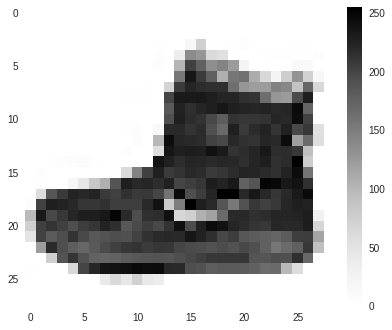

In [12]:

plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
train_images = train_images / 255

In [0]:
test_images = test_images / 255

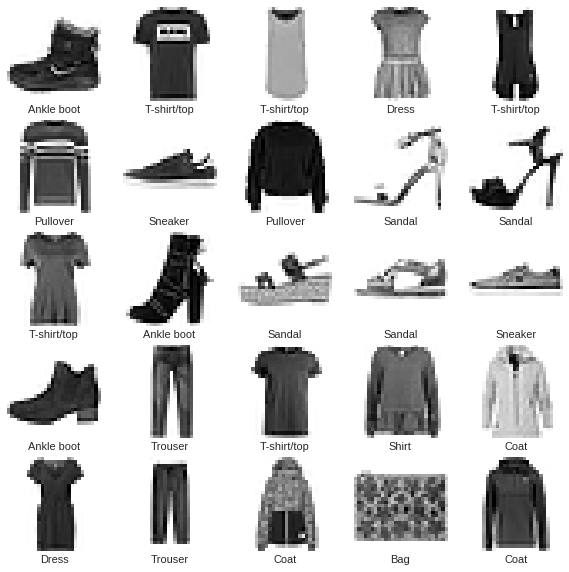

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.4958 - acc: 0.8261
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.3703 - acc: 0.8651
Epoch 3/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.3328 - acc: 0.8789
Epoch 4/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.3085 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.2921 - acc: 0.8920


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/step
Test accuracy: 0.8643


In [0]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([1.09044436e-06, 3.17203472e-08, 1.77485504e-07, 2.82839550e-11,
       1.08144365e-08, 4.11522156e-03, 4.57512428e-08, 1.85357779e-03,
       7.07227457e-07, 9.94029164e-01], dtype=float32)

In [24]:
test_images.shape

(10000, 28, 28)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

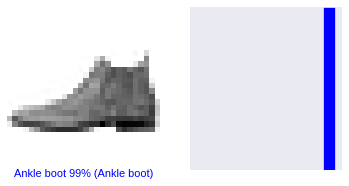

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

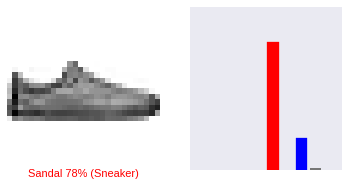

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

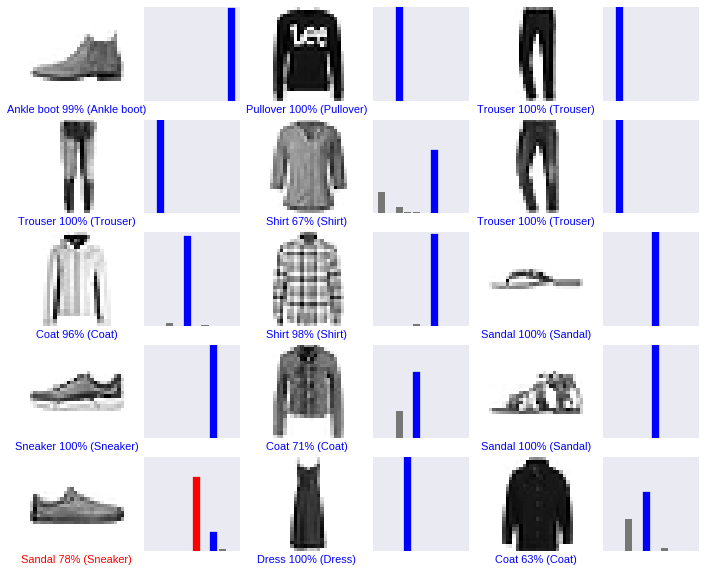

In [30]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [31]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [32]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0904454e-06 3.1720468e-08 1.7748533e-07 2.8284170e-11 1.0814395e-08
  4.1152136e-03 4.5751243e-08 1.8535778e-03 7.0722677e-07 9.9402916e-01]]


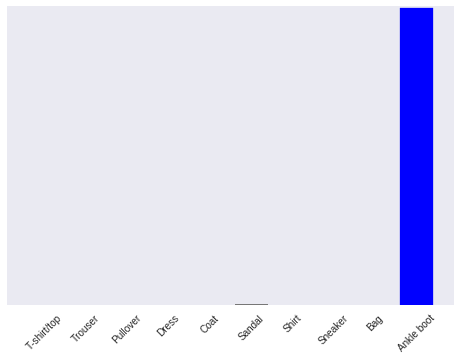

In [34]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [35]:
np.argmax(predictions_single[0])

9